In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
# from model.create_dataset import esm_alphabet, convert  
# from model.affinity_pred_model import AffinityPredictor
import random 
import torch 
from scipy.stats import pearsonr, spearmanr  

In [18]:
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('data/test_data_with_labels.csv')
df 

,POI,Sequence,Pred_affinity,affinity_class,seed_antibody,num_mutation,improve_binding
0,AAYL52_17482,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,3.529156,2,95,3,0
1,AAYL50_4604,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,3.473698,2,14,3,0
2,AAYL50_8859,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,2.075717,2,14,3,0
3,AAYL49_5937,EVQLVETGGGLVQPGGSLRLSCAASYFTLNSYGISWVRQAPGKGPE...,5.258817,3,14,3,0
4,AAYL51_14992,EVQLVESGGGLVQPGRSLRLSCAASGFTFDCYAMHWVRQAPGKGLE...,5.554412,3,91,3,0
...,...,...,...,...,...,...,...
11665,AAYL49_7492,EVQLVETGGGLVQPGGSLRLSCAASGHTLNSYGISWVRQAPGKGPE...,4.303723,2,14,3,0
11666,AAYL52_25476,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,4.206457,2,95,3,0
11667,AAYL49_26027,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,0.466430,1,14,3,1
11668,AAYL52_5571,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,3.535087,2,95,3,0


In [19]:
train_seq, test_seq, train_aff, test_aff = train_test_split(df['Sequence'], df['Pred_affinity'], 
                                                            test_size=0.2, random_state=123)


In [24]:
len(test_seq)

2334

# Ab-Affinity

In [124]:
from model.affinity_pred_model import AffinityPredictor
from model.utilities import get_model 

device = 'cuda' if torch.cuda.is_available() else 'cpu' 
model = get_model() 
model = model.to(device) 


In [125]:
seqs = train_seq.tolist() 
affs = train_aff.tolist() 
batch_size = 16 
all_train_embs = []   
for i in range(0, len(seqs), batch_size): 
    embs = model.get_embeddings(seqs[i:i+batch_size], mode='seq') 
    #print(embs)
    all_train_embs.extend(embs)
    print(i, end=' ')
print() 
all_train_embs = torch.stack(all_train_embs).detach().numpy() 
print(all_train_embs.shape) 


0 16 32 48 64 80 96 112 128 144 160 176 192 208 224 240 256 272 288 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576 592 608 624 640 656 672 688 704 720 736 752 768 784 800 816 832 848 864 880 896 912 928 944 960 976 992 1008 1024 1040 1056 1072 1088 1104 1120 1136 1152 1168 1184 1200 1216 1232 1248 1264 1280 1296 1312 1328 1344 1360 1376 1392 1408 1424 1440 1456 1472 1488 1504 1520 1536 1552 1568 1584 1600 1616 1632 1648 1664 1680 1696 1712 1728 1744 1760 1776 1792 1808 1824 1840 1856 1872 1888 1904 1920 1936 1952 1968 1984 2000 2016 2032 2048 2064 2080 2096 2112 2128 2144 2160 2176 2192 2208 2224 2240 2256 2272 2288 2304 2320 2336 2352 2368 2384 2400 2416 2432 2448 2464 2480 2496 2512 2528 2544 2560 2576 2592 2608 2624 2640 2656 2672 2688 2704 2720 2736 2752 2768 2784 2800 2816 2832 2848 2864 2880 2896 2912 2928 2944 2960 2976 2992 3008 3024 3040 3056 3072 3088 3104 3120 3136 3152 3168 3184 3200 3216 3232 3248 3264 3280 3296 3312 3328 3344 3360 3376 3392 3408 3

In [126]:
from sklearn.linear_model import LinearRegression 
clf_abaffinity = LinearRegression()
clf_abaffinity.fit(all_train_embs, affs) 

LinearRegression()

In [179]:
ts_seqs = test_seq.tolist() 
ts_affs = test_aff.tolist() 
batch_size = 16 
all_test_embs = []   
for i in range(0, len(ts_seqs), batch_size): 
    embs = model.get_embeddings(ts_seqs[i:i+batch_size], mode='seq') 
    all_test_embs.extend(embs)
    print(i, end=' ') 
print() 
all_test_embs = torch.stack(all_test_embs).detach().numpy() 
print(all_test_embs.shape) 

0 16 32 48 64 80 96 112 128 144 160 176 192 208 224 240 256 272 288 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576 592 608 624 640 656 672 688 704 720 736 752 768 784 800 816 832 848 864 880 896 912 928 944 960 976 992 1008 1024 1040 1056 1072 1088 1104 1120 1136 1152 1168 1184 1200 1216 1232 1248 1264 1280 1296 1312 1328 1344 1360 1376 1392 1408 1424 1440 1456 1472 1488 1504 1520 1536 1552 1568 1584 1600 1616 1632 1648 1664 1680 1696 1712 1728 1744 1760 1776 1792 1808 1824 1840 1856 1872 1888 1904 1920 1936 1952 1968 1984 2000 2016 2032 2048 2064 2080 2096 2112 2128 2144 2160 2176 2192 2208 2224 2240 2256 2272 2288 2304 2320 
(2334, 1280)


In [180]:
predicted_values = clf_abaffinity.predict(all_test_embs)

pearson_corr_1, p_value_1 = pearsonr(ts_affs, predicted_values) 
print(pearson_corr_1)

spearman_corr_1, p_value_2 = spearmanr(ts_affs, predicted_values) 
print(spearman_corr_1)

0.6552448650843835
0.6075517252981196


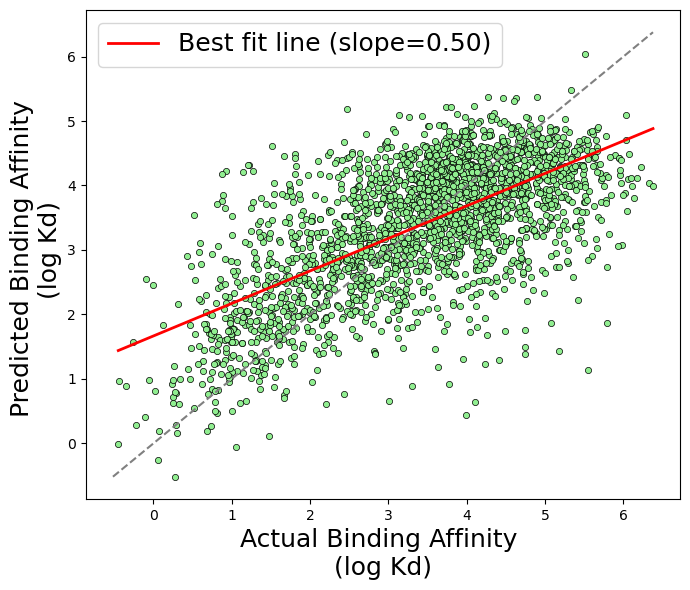

In [181]:
plt.figure(figsize=(7, 6))
plt.scatter(ts_affs, predicted_values, color='lightgreen', s=20, edgecolor='black', linewidths=0.5)

min_val = min(min(ts_affs), min(predicted_values))
max_val = max(max(ts_affs), max(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--') 

#plt.text(3.2, -0.4, f'Pearson Correlation = {pearson_corr_1:.2f}', ha='left', va='top', fontsize=25, color='black',
#         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.75'))

m, b = np.polyfit(ts_affs, predicted_values, 1)   
x_fit = np.linspace(min(ts_affs), max(ts_affs), 100)   
plt.plot(x_fit, m * x_fit + b, color='red', linewidth=2, label=f'Best fit line (slope={m:0.2f})')

# Add labels and title
plt.xlabel('Actual Binding Affinity \n(log Kd)', fontsize=18)
plt.ylabel('Predicted Binding Affinity \n (log Kd)', fontsize=18)
plt.legend(fontsize=18, loc='upper left')

# Show plot
plt.grid(False)
plt.tight_layout()
plt.savefig('plots/regression_abaffinity.png')
plt.show()


# ESM-2

In [42]:
import esm

In [30]:
class ESM2_tokenizer:
    def __init__(self) -> None:
        self.tokens = ['<cls>', '<pad>', '<eos>', '<unk>', 'L',  'A', 'G', 'V', 'S', 'E', 'R', 
                       'T', 'I', 'D', 'P', 'K', 'Q', 'N', 'F', 'Y', 'M', 'H', 'W', 'C', 'X', 
                       'B', 'U', 'Z', 'O', '.', '-', '<null_1>', '<mask>'] 
        self.token2idx = {token: idx for idx, token in enumerate(self.tokens)}

    def convert(self, seq, length=None, masking=False):
        #print(len(seq))
        if length is None:
            length = len(seq) 
        tokens = np.full(length + 2, self.token2idx['<pad>'], dtype=np.int32)
        tokens[0] = self.token2idx['<cls>']
        tokens[-1] = self.token2idx['<eos>']
        if masking:
            mask = np.zeros(length + 2, dtype=np.int32)
            mask[0] = 1
            mask[-1] = 1
        if len(seq) > length:
            start = np.random.randint(len(seq) - length)
            seq = seq[start: start + length]
        else:
            length = len(seq) 
        tokens[1:1 + length] = [self.token2idx.get(tok, self.token2idx['<unk>']) for tok in seq]
        if masking: 
            mask[1:1 + length] = 1
            return torch.tensor(tokens, dtype=torch.long), torch.tensor(mask, dtype=torch.long)
        else:
            return torch.tensor(tokens, dtype=torch.long) 
    
    def encode(self, seq, length=None, masking=False):
        if isinstance(seq, str):
            return self.convert(seq, length, masking) 
        elif isinstance(seq, list): 
            ids = [] 
            if masking:
                masks = [] 
                for s in seq:
                    i, m = self.convert(s, length, masking)
                    ids.append(i)
                    masks.append(m)
                return torch.stack(ids), torch.stack(masks) 
            else:
                for s in seq:
                    i = self.convert(s, length, masking)
                    ids.append(i)
                return torch.stack(ids)
        else:
            print('Mulitple sequences must be in a list as input.')
    
    def decode(self, seq_ids):
        special_tokens = ('<cls>', '<pad>', '<eos>', '<unk>', '<null_1>', '<mask>') 
        if len(seq_ids) == 1:
            return ''.join([self.tokens[i] for i in seq_ids[0] if self.tokens[i] not in special_tokens]) 
        else:
            decoded_seq = [] 
            for s in seq_ids:
                decoded_seq.append(''.join([self.tokens[i] for i in s if self.tokens[i] not in special_tokens]))
            return decoded_seq


In [44]:
def get_esm_repr(seq, mask):
    esm_model, _ = esm.pretrained.esm2_t30_150M_UR50D()
    with torch.no_grad():
        model_outputs = esm_model(seq, repr_layers=[30]) 
    rep = model_outputs["representations"][30]  # Shape: [batch_size, vhh_seq_len, esm_dim]
    rep = rep[:, 1:-1, :]  # Remove CLS and EOS tokens
    # Apply the mask (assuming mask shape: [batch_size, vhh_seq_len - 2])
    # Only keep representations where mask is 1 and calculate the mean
    mask = mask[:, 1:-1].unsqueeze(-1).expand_as(rep)  # Adjust mask shape to match rep
    masked_rep = rep * mask  # Zero out positions where mask is 0
    masked_mean_rep = masked_rep.sum(dim=1) / mask.sum(dim=1)  # Mean over masked positions
    return masked_mean_rep  # Shape: [batch_size, esm_dim] 

def tokenize_seq(seqs, length): 
    tokenizer = ESM2_tokenizer() 
    ids = [] 
    masks = [] 
    for seq in seqs:
        id, mask = tokenizer.encode(seq, length, masking=True) 
        ids.append(torch.tensor(id))
        masks.append(torch.tensor(mask))
    return torch.stack(ids), torch.stack(masks)   

In [ ]:
seqs = train_seq.tolist() 
affs = train_aff.tolist() 
batch_size = 16 
all_train_embs = []   
for i in range(0, len(seqs), batch_size): 
    ids, masks = tokenize_seq(seqs[i:i+batch_size], 270)
    embs = get_esm_repr(ids, masks) 
    all_train_embs.extend(embs.clone().detach().numpy())
    print(i, end=' ')
print() 
print(len(all_train_embs)) 


In [57]:
from sklearn.linear_model import LinearRegression 
clf = LinearRegression()
clf.fit(all_train_embs, affs) 


LinearRegression()

In [59]:
seqs = test_seq.tolist() 
test_affs = test_aff.tolist() 
batch_size = 16 
all_embs = []   
for i in range(0, len(seqs), batch_size): 
    ids, masks = tokenize_seq(seqs[i:i+batch_size], 270)
    embs = get_esm_repr(ids, masks) 
    all_embs.extend(embs.clone().detach().numpy())
    print(i, end=' ')
print() 
print(len(all_embs)) 

/var/folders/tg/f0jwz81x22s5z6lnwt1nxtn00000gp/T/ipykernel_2122/3374702581.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  ids.append(torch.tensor(id))
/var/folders/tg/f0jwz81x22s5z6lnwt1nxtn00000gp/T/ipykernel_2122/3374702581.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  masks.append(torch.tensor(mask))


0 16 32 48 64 80 96 112 128 144 160 176 192 208 224 240 256 272 288 304 320 336 352 368 384 400 416 432 448 464 480 496 512 528 544 560 576 592 608 624 640 656 672 688 704 720 736 752 768 784 800 816 832 848 864 880 896 912 928 944 960 976 992 1008 1024 1040 1056 1072 1088 1104 1120 1136 1152 1168 1184 1200 1216 1232 1248 1264 1280 1296 1312 1328 1344 1360 1376 1392 1408 1424 1440 1456 1472 1488 1504 1520 1536 1552 1568 1584 1600 1616 1632 1648 1664 1680 1696 1712 1728 1744 1760 1776 1792 1808 1824 1840 1856 1872 1888 1904 1920 1936 1952 1968 1984 2000 2016 2032 2048 2064 2080 2096 2112 2128 2144 2160 2176 2192 2208 2224 2240 2256 2272 2288 2304 2320 
2334


In [169]:
predicted_values = clf.predict(all_embs)

pearson_corr_1, p_value_1 = pearsonr(test_affs, predicted_values) 
print(pearson_corr_1)

spearman_corr_1, p_value_2 = spearmanr(test_affs, predicted_values) 
print(spearman_corr_1)

0.5659984225814773
0.5487097408055538


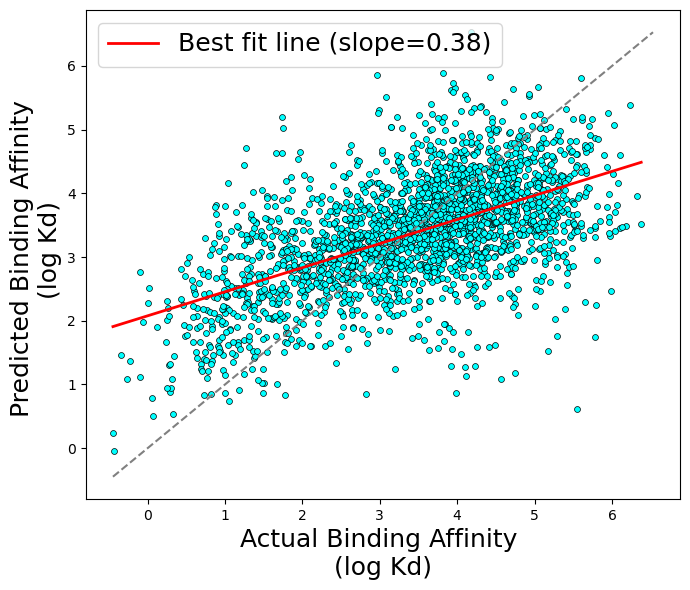

In [177]:
plt.figure(figsize=(7, 6))
plt.scatter(test_affs, predicted_values, color='cyan', s=18, edgecolor='black', linewidths=0.5)

# Add a line indicating perfect predictions (actual = predicted)
min_val = min(min(test_affs), min(predicted_values))
max_val = max(max(test_affs), max(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--') 

#plt.text(3.2, -0.4, f'Pearson Correlation = {pearson_corr_1:.2f}', ha='left', va='top', fontsize=25, color='black',
#         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.75'))

m, b = np.polyfit(test_affs, predicted_values, 1)  # m is slope, b is intercept 
x_fit = np.linspace(min(test_affs), max(test_affs), 100)  # 100 points from min to max of x
plt.plot(x_fit, m * x_fit + b, color='red', linewidth=2, label=f'Best fit line (slope={m:0.2f})')

# Add labels and title
plt.xlabel('Actual Binding Affinity \n(log Kd)', fontsize=18)
plt.ylabel('Predicted Binding Affinity \n (log Kd)', fontsize=18)
#plt.title('Predicting binding affinity using regression\n(Ab-Affinity Model Embedding) ', fontsize=18)
plt.legend(fontsize=18, loc='upper left')

# Show plot
plt.grid(False)
plt.tight_layout()
plt.savefig('plots/regression_esm2.png')
plt.show() 


# AbLang

In [141]:
import ablang 
import numpy as np 

In [140]:
heavy_ablang = ablang.pretrained("heavy")
heavy_ablang.freeze()

light_ablang = ablang.pretrained("light")
light_ablang.freeze()

In [147]:
all_train_embs = []   
for seq in train_seq:
    vh, vl = seq.split('GGGGSGGGGSGGGGS')
    vh_emb = heavy_ablang(vh, mode='seqcoding')
    vl_emb = light_ablang(vl, mode='seqcoding')
    emb = np.concatenate((vh_emb, vl_emb), axis=1)
    all_train_embs.append(emb[0])
    #print(emb.shape)
    

In [153]:
all_train_embs[0].shape

(1536,)

In [148]:
from sklearn.linear_model import LinearRegression 
clf_ablang = LinearRegression()
clf_ablang.fit(all_train_embs, train_aff) 

LinearRegression()

In [149]:
all_test_embs = []   
ts_affs = test_aff.tolist()  
for seq in test_seq:
    vh, vl = seq.split('GGGGSGGGGSGGGGS')
    vh_emb = heavy_ablang(vh, mode='seqcoding')
    vl_emb = light_ablang(vl, mode='seqcoding')
    emb = np.concatenate((vh_emb, vl_emb), axis=1)
    all_test_embs.append(emb[0])
    #print(emb.shape)

In [154]:
predicted_values = clf_ablang.predict(all_test_embs)

pearson_corr_1, p_value_1 = pearsonr(ts_affs, predicted_values) 
print(pearson_corr_1)

spearman_corr_1, p_value_2 = spearmanr(ts_affs, predicted_values) 
print(spearman_corr_1) 

0.5384762073545093
0.5225591347722564


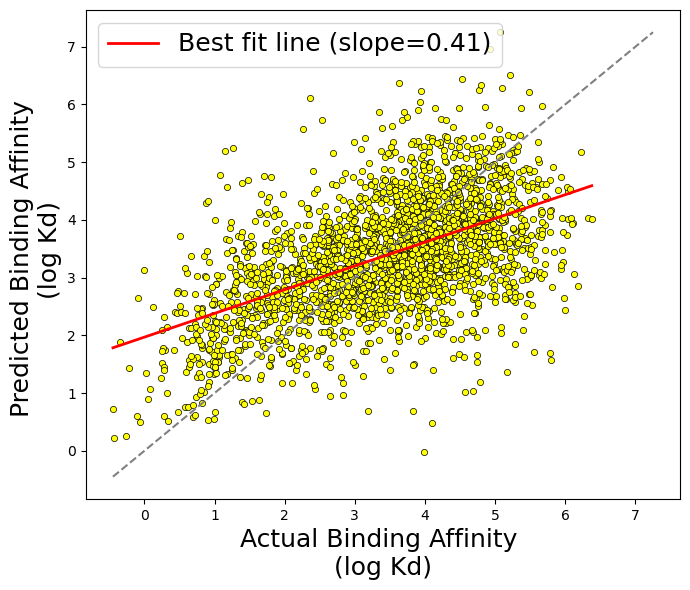

In [166]:
plt.figure(figsize=(7, 6))
plt.scatter(ts_affs, predicted_values, color='yellow', s=20, edgecolor='black', linewidths=0.5)

min_val = min(min(ts_affs), min(predicted_values))
max_val = max(max(ts_affs), max(predicted_values))
plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--') 

#plt.text(3.2, -0.4, f'Pearson Correlation = {pearson_corr_1:.2f}', ha='left', va='top', fontsize=25, color='black',
#         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.75'))

m, b = np.polyfit(ts_affs, predicted_values, 1)   
x_fit = np.linspace(min(ts_affs), max(ts_affs), 100)   
plt.plot(x_fit, m * x_fit + b, color='red', linewidth=2, label=f'Best fit line (slope={m:0.2f})')

# Add labels and title
plt.xlabel('Actual Binding Affinity \n(log Kd)', fontsize=18)
plt.ylabel('Predicted Binding Affinity \n (log Kd)', fontsize=18)
plt.legend(fontsize=18, loc='upper left')

# Show plot
plt.grid(False)
plt.tight_layout()
plt.savefig('plots/regression_ablang.png') 
plt.show()


# DG-Affinity


In [130]:
dgdf = pd.read_csv('prediciton_abaffinity_dgaffinity.csv')

In [131]:
dgdf

,Sequence_x,VH,VL,Pred_affinity_x,Model_Predicted_Affinity,DGAffinity
0,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,SSELTQDPAVSVALGQTVRITCEGDSHRYYYANWYQQKPGQAPILV...,5.227305,4.116121,-7.985
1,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,4.742241,4.150207,-9.472
2,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,1.702532,1.803358,-9.217
3,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,SSELTQDPAVSVALGQTVRITCEDDSLRYNYANWYQQKPGQAPILV...,1.416177,2.661693,-7.965
4,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,EVQLVESGGGLVQPGRSLRLSCAASGFTFDDYAMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,1.203717,2.918820,-7.702
...,...,...,...,...,...,...
1495,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,EVQLVESGAEVKKPGASVKVSCKASGYTFTSYGISWVRQAPGQGLE...,SSELTQDPAVSVALGQTVRITCEGDSLRYYYANWYQQKPGQAPILV...,4.419535,3.490891,-7.891
1496,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFTLNSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,4.229747,4.188740,-9.534
1497,EVQLVESGGGLVQPGRSLRLSCAASGFTFPDYQMHWVRQAPGKGLE...,EVQLVESGGGLVQPGRSLRLSCAASGFTFPDYQMHWVRQAPGKGLE...,QAVLTQPSSLSASPGASVSLTCTLRSGINVGTYRIYWYQQKPGSPP...,5.440258,4.386018,-7.797
1498,EVQLVETGGGLVQPGGSLRLSCAASGFRLDSYGISWVRQAPGKGPE...,EVQLVETGGGLVQPGGSLRLSCAASGFRLDSYGISWVRQAPGKGPE...,DVVMTQSPESLAVSLGERATISCKSSQSVLYESRNKNSVAWYQQKA...,0.987834,1.751337,-9.338


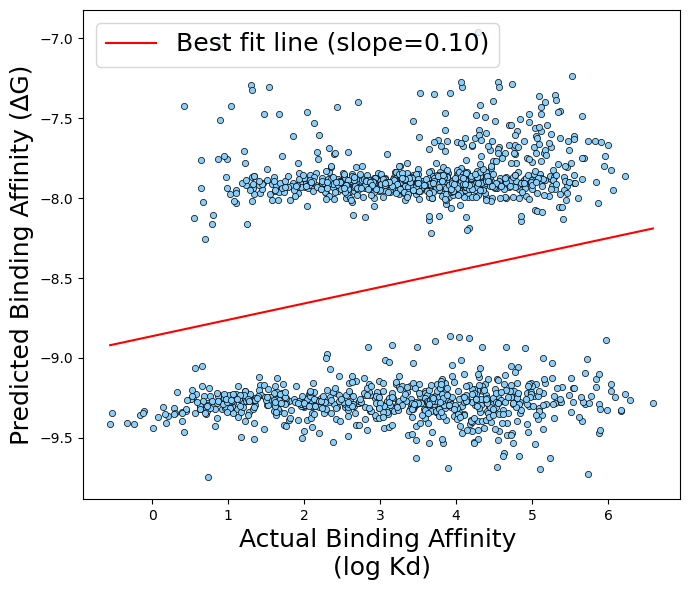

In [165]:
ts_affs0 = dgdf['Pred_affinity_x'].tolist()
predicted_values0 = dgdf['DGAffinity'].tolist() 
plt.figure(figsize=(7, 6))
plt.scatter(ts_affs0, predicted_values0, color='lightskyblue', s=20, edgecolor='black', linewidths=0.5)

min_val = min(min(ts_affs0), min(predicted_values0))
max_val = max(max(ts_affs0), max(predicted_values0))
#plt.plot([min_val, max_val], [min_val, max_val], color='gray', linestyle='--') 

#plt.text(3.2, -0.4, f'Pearson Correlation = {pearson_corr_1:.2f}', ha='left', va='top', fontsize=25, color='black',
#         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.75'))

m, b = np.polyfit(ts_affs0, predicted_values0, 1)   
x_fit = np.linspace(min(ts_affs0), max(ts_affs0), 100)   
plt.plot(x_fit, m * x_fit + b, color='red', label=f'Best fit line (slope={m:0.2f})')

# Add labels and title
plt.xlabel('Actual Binding Affinity \n(log Kd)', fontsize=18)
plt.ylabel('Predicted Binding Affinity (∆G)', fontsize=18)
plt.legend(fontsize=18, loc='upper left')

# Show plot
plt.grid(False)
plt.tight_layout()
plt.savefig('plots/dgaffinity.png')
plt.show()

# END